In [5]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import warnings

import numpy as np

from tqdm import tnrange, tqdm_notebook
import multiprocessing as mp

import matplotlib.pyplot as plt
from matplotlib import rcParams

from astropy.utils.console import ProgressBar

from riker.galaxy import GalaxyMap
from riker.data import BeneMassAgeZMaps


warnings.filterwarnings("ignore")

plt.rc('text', usetex=True)
rcParams.update({'axes.linewidth': 1.5})
rcParams.update({'xtick.direction': 'in'})
rcParams.update({'ytick.direction': 'in'})
rcParams.update({'xtick.minor.visible': 'True'})
rcParams.update({'ytick.minor.visible': 'True'})
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '8.0'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '4.0'})
rcParams.update({'xtick.minor.width': '1.5'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '8.0'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '4.0'})
rcParams.update({'ytick.minor.width': '1.5'})
rcParams.update({'axes.titlepad': '10.0'})
rcParams.update({'font.size': 25})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Prepare the Illustris 100 z=0.4 high-resolution HDF5 data

In [2]:
# Input HDF5 from simulation
ori_dir = '/Users/song/data/massive/simulation/riker/ori/'

# HDF5 files
ori_file = os.path.join(ori_dir, 'galaxies_orig_108_agez_highres.hdf5')

ori_label = 'ori100_z0.4_hres'

ori_data = BeneMassAgeZMaps(ori_file, label=ori_label)

### Batch reduction of all galaxies in `xy` projection

In [10]:
def reduce(idx, hdf5, proj='yz'):
    """Reduce a single galaxy."""
    gal = GalaxyMap(hdf5, idx, proj=proj, aper_force=None)
    summary = gal.run_all(plot=False, output=True)
    
    return summary

In [11]:
gal = GalaxyMap(ori_data, 211, proj='xy')
gal.aper_summary()

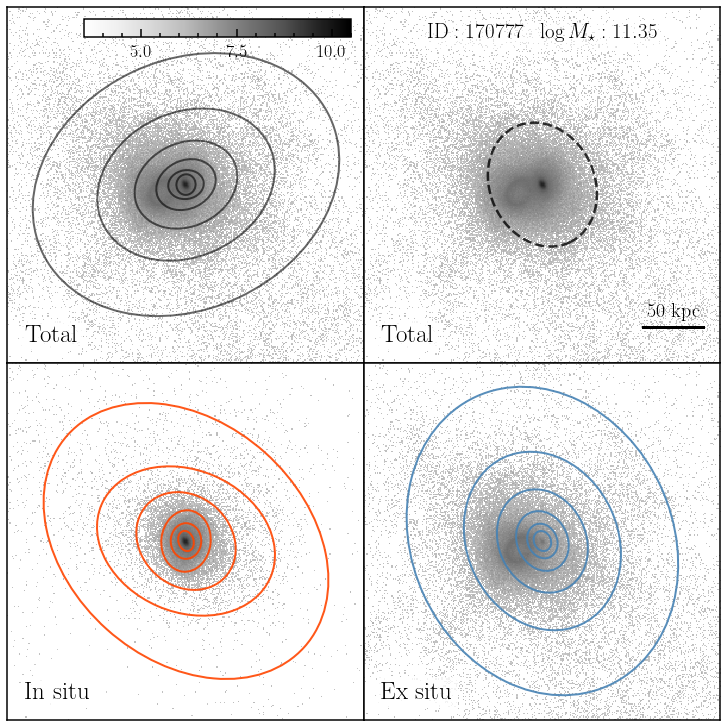

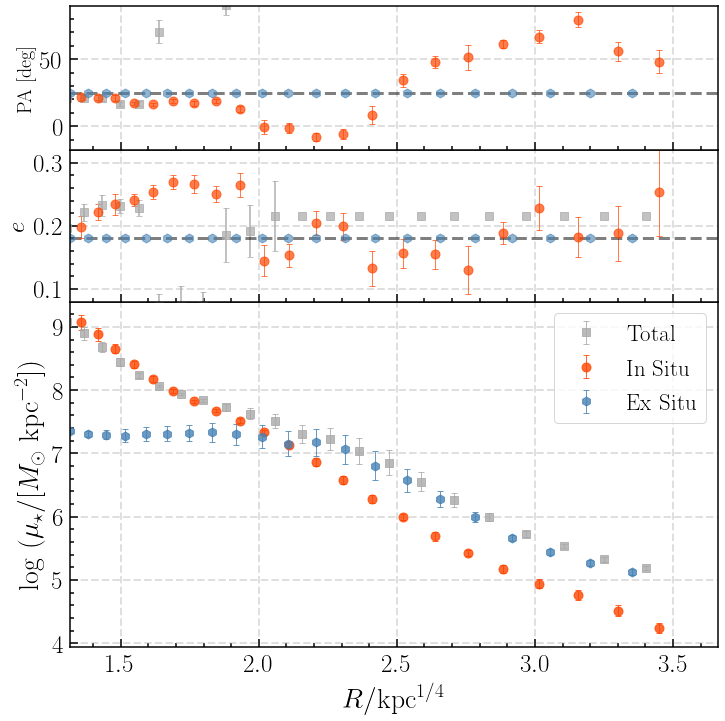

In [13]:
_ = gal.show_prof()

In [6]:
yz_sum = []

#for idx in range(ori_data.n_gal):
for idx in np.arange(187, ori_data.n_gal, 1):
    print("# Dealing with galaxy: {}".format(idx))
    yz_sum.append(reduce(idx, ori_data))

# Dealing with galaxy: 187
# Dealing with galaxy: 188
# Dealing with galaxy: 189
# Dealing with galaxy: 190
# Dealing with galaxy: 191
# Dealing with galaxy: 192
# Dealing with galaxy: 193
# Dealing with galaxy: 194
# Dealing with galaxy: 195
# Dealing with galaxy: 196
# Dealing with galaxy: 197
# Dealing with galaxy: 198
# Dealing with galaxy: 199
# Dealing with galaxy: 200
# Dealing with galaxy: 201
# Dealing with galaxy: 202
# Dealing with galaxy: 203
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
###  ELLIPSE RUN FAILED IN ATTEMPT:  0
###  Error Information :  XXX Can not find the outBin: /Users/song/data/massive/simulation/riker/ori/fits/ori100_z0.4_hres_203_167234_yz_mass_gal_ellip_2.bin!
----------------------------------------------------------------------------------------------------
###  Maxsma  175.0 -->  157.5
----------------------------------------------------------------------------------------------------
!!!!!!!!!!

TypeError: 'NoneType' object is not subscriptable